<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Topic-Modeling" data-toc-modified-id="Topic-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Topic Modeling</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#LatentDirichletAllocation" data-toc-modified-id="LatentDirichletAllocation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LatentDirichletAllocation</a></span></li><li><span><a href="#Non-negative-Matrix-Factorization-(NMF)" data-toc-modified-id="Non-negative-Matrix-Factorization-(NMF)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Non-negative Matrix Factorization (NMF)</a></span></li><li><span><a href="#Randomized_SVD--Sklearn" data-toc-modified-id="Randomized_SVD--Sklearn-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Randomized_SVD -Sklearn</a></span></li><li><span><a href="#Randomized_SVD--FB" data-toc-modified-id="Randomized_SVD--FB-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Randomized_SVD -FB</a></span></li></ul></li><li><span><a href="#Final-Topic" data-toc-modified-id="Final-Topic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Topic</a></span></li></ul></div>

# Topic Modeling 


In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%matplotlib inline
np.set_printoptions(suppress=True)

# Load Data

In [ ]:
data= pd.read_csv('/content/quora_questions.csv')

In [ ]:
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
data.shape

(404289, 1)

In [ ]:
train= data[:354289]
test=data[354289:]

In [ ]:
train.shape, test.shape

((354289, 1), (50000, 1))

# Data Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
train_vectors = tfidf.fit_transform(train['Question'])
train_vectors.shape # (documents, vocab)

(354289, 36349)

In [ ]:
test_vectors = tfidf.transform(test['Question'])

In [ ]:
vocab = np.array(tfidf.get_feature_names())

In [ ]:
vocab.shape

(36349,)

In [ ]:
vocab[8000:8050]

array(['convection', 'convenience', 'convenient', 'convent', 'convention',
       'conventional', 'conventions', 'converaion', 'converge',
       'convergence', 'convergent', 'converging', 'convergys',
       'conversation', 'conversational', 'conversationalist',
       'conversations', 'converse', 'conversing', 'conversion',
       'conversions', 'converstaion', 'convert', 'converted', 'converter',
       'converters', 'convertible', 'converting', 'converts', 'convex',
       'convexity', 'convey', 'conveyancing', 'conveyor', 'convict',
       'convicted', 'conviction', 'convictions', 'convicts', 'convience',
       'convince', 'convinced', 'convincing', 'convocation', 'convoluted',
       'convolution', 'convolutional', 'convos', 'conway', 'coo'],
      dtype='<U28')

# Model

## LatentDirichletAllocation

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
model = LatentDirichletAllocation(n_components=19,random_state=42)

In [ ]:
# fit the model to train data
model.fit(train_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=19, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
len(tfidf.get_feature_names())

36349

In [ ]:
import random

In [ ]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

carroll
emraan
informatica
2000rs
customize
dermatologist
indicated
convection
graphing
connectionn


In [ ]:
len(model.components_)

19

In [ ]:
single_topic = model.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([34184, 34383, 33285, ..., 35389, 18830, 33477])

In [ ]:
# Word least representative of this topic
single_topic[8370]

0.05263157894736844

In [ ]:
# Word most representative of this topic
single_topic[11181]

0.052631578947368515

In [ ]:
top_word_indices = single_topic.argsort()[-20:]

In [ ]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

languages
did
gain
presidential
way
english
math
election
win
best
hillary
clinton
president
programming
language
lose
donald
weight
learn
trump


In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['english', 'math', 'election', 'win', 'best', 'hillary', 'clinton', 'president', 'programming', 'language', 'lose', 'donald', 'weight', 'learn', 'trump']


THE TOP 15 WORDS FOR TOPIC #1
['way', 'good', 'interview', 'tips', 'data', 'writing', 'laptop', 'science', 'sex', 'skills', 'computer', 'job', 'english', 'best', 'improve']


THE TOP 15 WORDS FOR TOPIC #2
['new', 'rupee', 'india', 'indian', 'think', 'women', 'men', 'rs', 'things', 'black', 'people', 'notes', '1000', '500', 'know']


THE TOP 15 WORDS FOR TOPIC #3
['games', 'internet', 'control', 'market', 'stock', 'ways', 'friends', 'best', 'way', 'god', 'youtube', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['penis', 'oil', 'iq', 'age', 'united', 'states', 'hotel', 'police', 'hair', 'does', 'sleep', 'grow', 'years', 'year', 'old']


THE TOP 15 WORDS FOR TOPIC #5
['mba', 'india', 'university', 'student', 'college', 'engineer', 'good', 'mechanical', 'career', 'start', 'study', 'exa

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

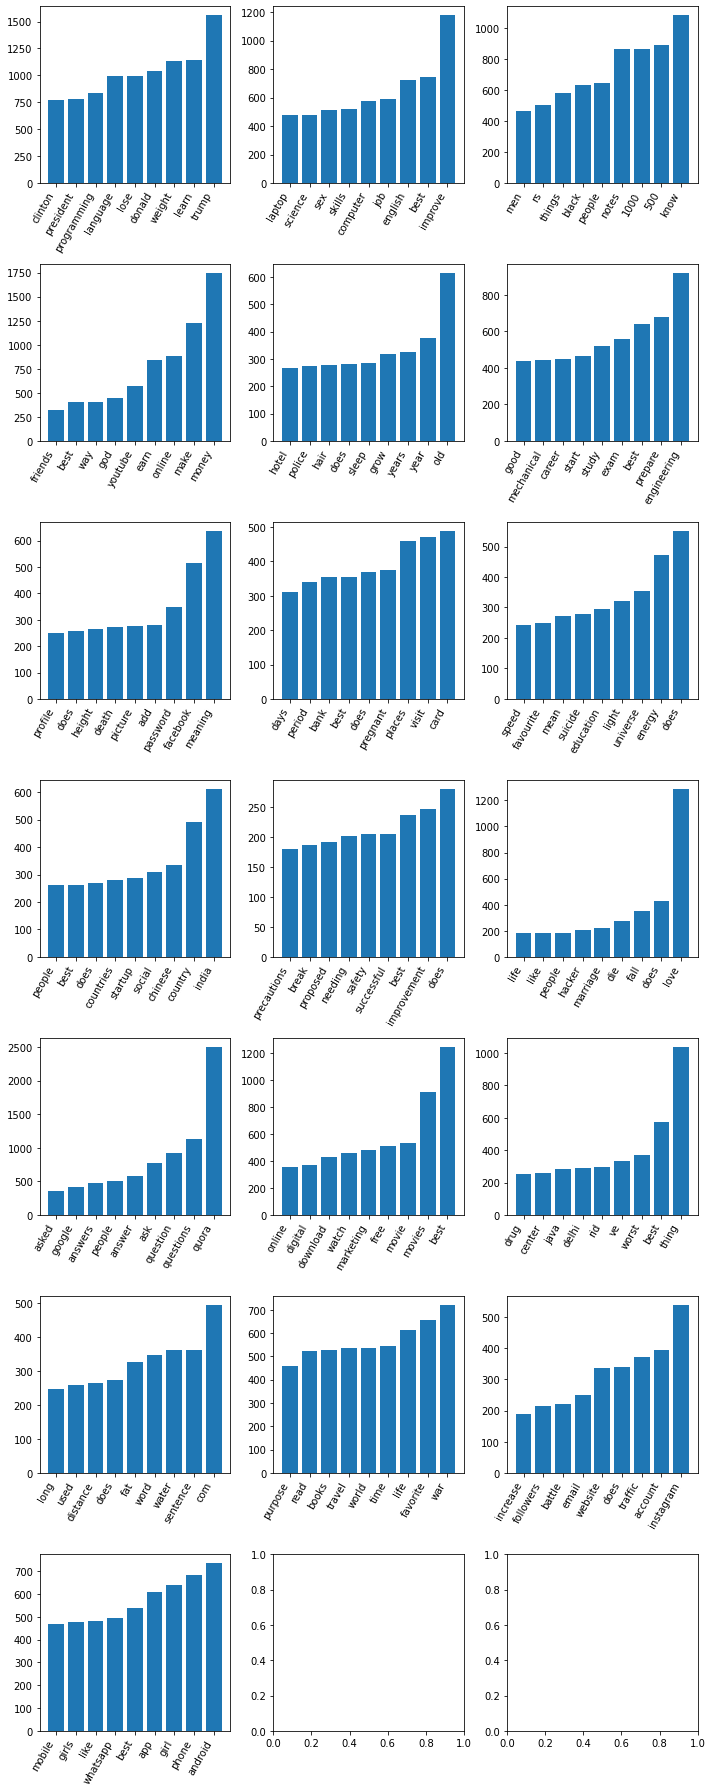

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 4
fig, axes = plt.subplots(7,3, figsize=(10, 25))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=9, ax=ax)
    
plt.tight_layout()

## Non-negative Matrix Factorization (NMF)

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
model = NMF(n_components=20,random_state=42)

In [ ]:
# fit the model to train data
model.fit(train_vectors)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
len(tfidf.get_feature_names())

36349

In [ ]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

coupon
1240
enfps
danny
champlain
candy
eye
enjoys
easiness
accessed


In [ ]:
len(model.components_[0])

36349

In [ ]:
single_topic = model.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([    0, 21282, 21281, ...,  4940, 21557,  4356])

In [ ]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([24508,  5604, 21556, 18661, 35288,   453,  4954,  4940, 21557,
        4356])

In [ ]:
top_word_indices = single_topic.argsort()[-20:]

In [ ]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

coaching
hollywood
thing
friend
site
website
read
place
visit
places
phone
buy
movie
laptop
ways
2016
books
book
movies
best


In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['website', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'movie', 'laptop', 'ways', '2016', 'books', 'book', 'movies', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['majors', 'grads', 'recruit', 'differ', 'looking', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['add', 'answered', 'post', 'needing', 'easily', 'improvement', 'delete', 'asked', 'google', 'answer', 'answers', 'ask', 'question', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['using', 'easiest', 'website', 'friends', 'black', 'free', 'internet', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['balance', 'day', 'earth', 'death', 'changed', 'want', 'live', 'change', 'moment', 'real', 'important', 'thing', 'meaning', 'purpose', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['reservation', 'engineering', 'company', 'business', 'president', 'minister', 'china', 'olympics'

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

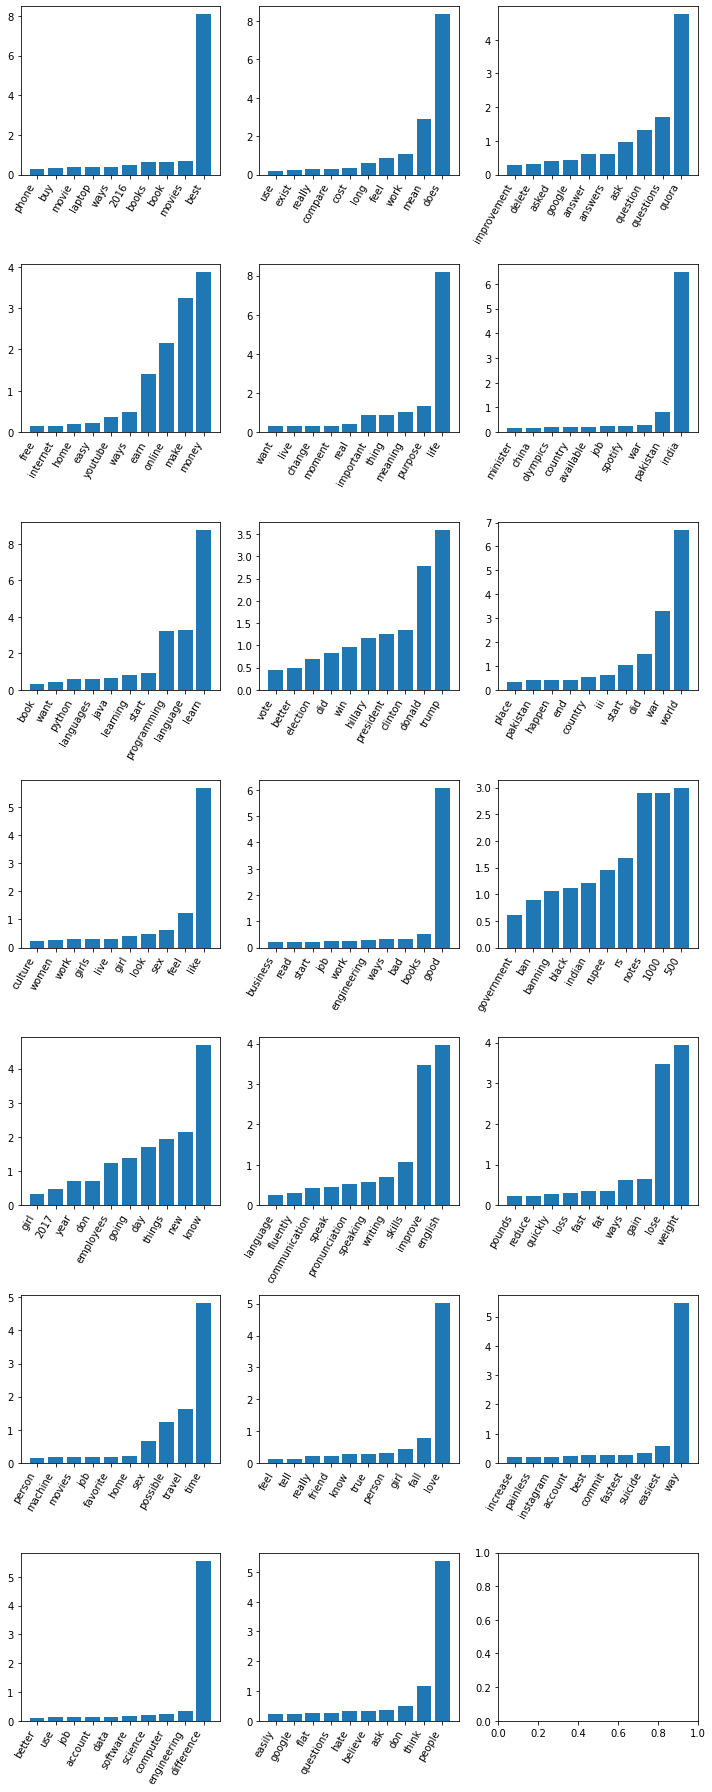

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(7,3, figsize=(10, 25))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

## Randomized_SVD -Sklearn

In [ ]:
from sklearn.decomposition import randomized_svd

In [ ]:
u, s, v = randomized_svd(train_vectors,n_components=20)

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

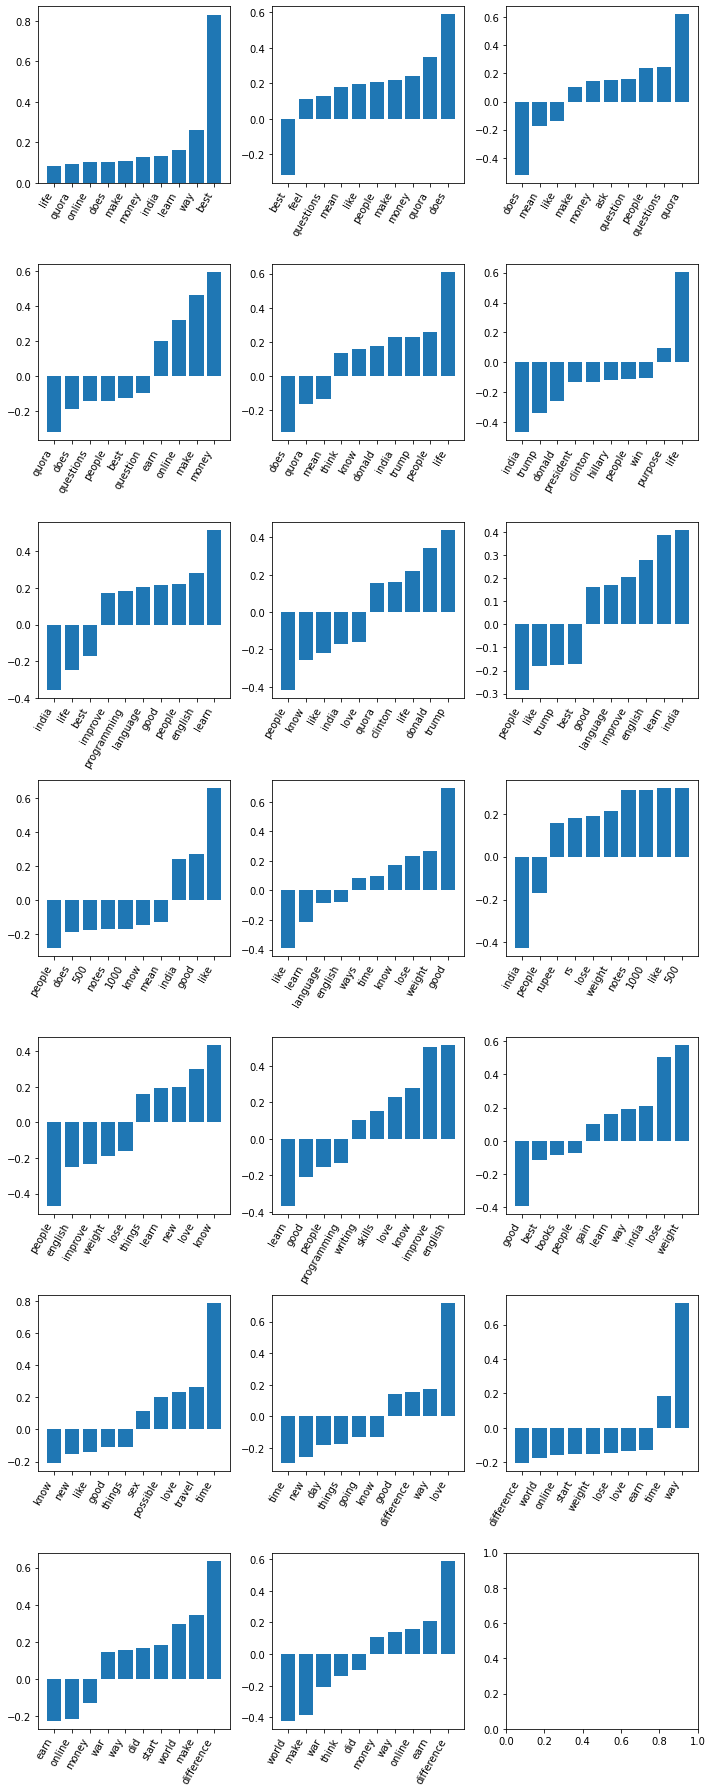

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(7,3, figsize=(10, 25))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

## Randomized_SVD -FB


In [ ]:
!pip install fbpca

In [ ]:
import fbpca
u, s, v = fbpca.pca(train_vectors,20)

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

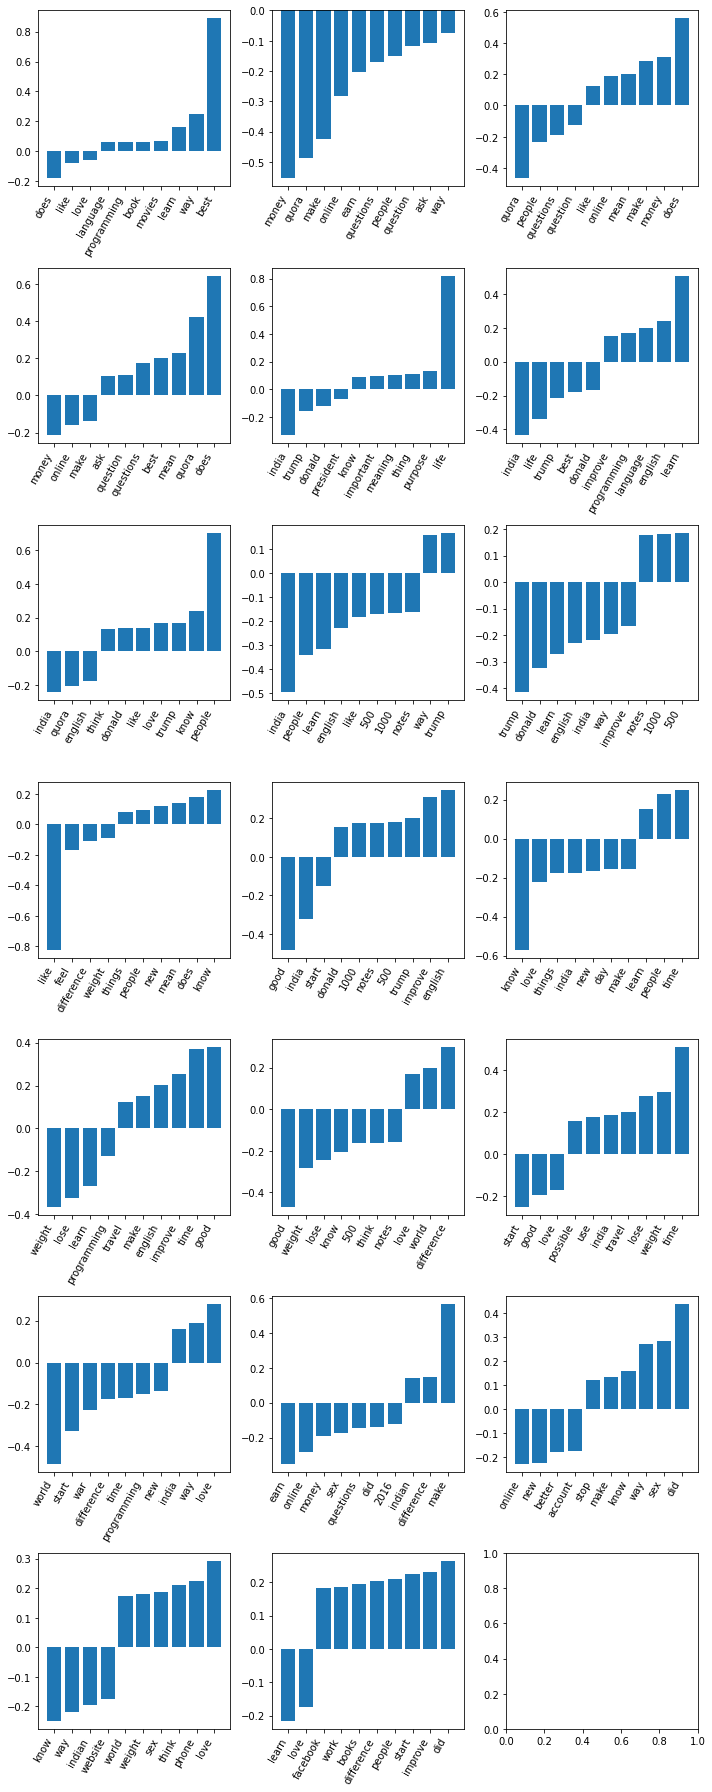

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(7,3, figsize=(10, 25))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

# Final Topic

I have tried to find topic using n_component from 4 to 20 and used **LatentDirichletAllocation** model to derive the below topic

Final n_component used **19**




**Topics:**


1.  US President Election
2.  Improve Skills
3.  Demonitisation of 500/1000 notes in India
4.  Best way to earn money online
5.  Hotel in United States 
6.  Study
7.  Facebook Profile Password
8.  Visit to a Place
9.  Universe
10. Country with best startup
11. Precaution 
12. Life
13. Search question 
14. Best Movies to watch online  
15. Best Thing do in Delhi
16. Fat Body 
17. Favoriate reading topic 
18. Social Media
19. Phone


